# PROJECT AKHIR KECERDASAN BUATAN
# Klasifikasi Jenis Sampah
#### Kelompok 7 (A1-21)
#### Nama Anggota :
#### Rezky Nur Sya'ban         (2109106009)
#### Andi Nur Fadilah          (2109106015)
#### Adlina Safa Sephia Putri  (2109106021)

# Mengimport Library yang Dibutuhkan

In [4]:
import splitfolders
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Collecting

## Data Split
##### Memisahkan dataset ke dalam beberapa folder: train, test, dan val dengan porsi 70 : 10 : 20

In [5]:
# splitfolders.ratio("Garbage classification/Garbage classification/", output = "Klasifikasi Sampah", seed = 1337, ratio = (.7, .1, .2), group_prefix = None)

## Memuat Dataset

### A. Train

In [6]:
dataset_train = image_dataset_from_directory(
    'Klasifikasi Sampah/train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (80, 80),
    shuffle = True, 
    seed = 47,
)

Found 1102 files belonging to 3 classes.


### B. Validation

In [7]:
dataset_val = image_dataset_from_directory(
    'Klasifikasi Sampah/val/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (80, 80),
    shuffle = True, 
    seed = 47,
)

Found 157 files belonging to 3 classes.


### C. Test

In [5]:
dataset_test = image_dataset_from_directory(
    'Klasifikasi Sampah/test/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (80, 80),
    shuffle = True, 
    seed = 47,
)

Found 318 files belonging to 3 classes.


# Data Preprocessing

## Augmentasi

In [2]:
train_dir = 'Klasifikasi Sampah/train/'
test_dir = 'Klasifikasi Sampah/test/'
val_dir = 'Klasifikasi Sampah/val/'

In [9]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    brightness_range = (0.5,1.0),
                    shear_range = 0.2,
                    zoom_range = (0.8,1.0),
                    fill_mode = 'nearest',
                    horizontal_flip  = True,
                    vertical_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen  = ImageDataGenerator(rescale=1./255)


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size = (80,80), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size = 256,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (80,80),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (80,80),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1102 images belonging to 3 classes.
Found 157 images belonging to 3 classes.
Found 318 images belonging to 3 classes.


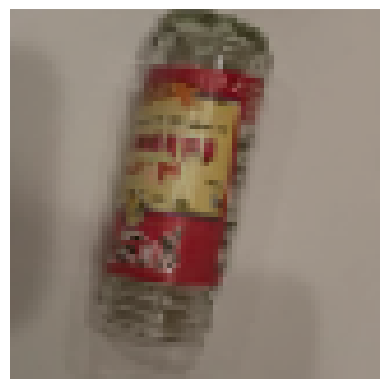

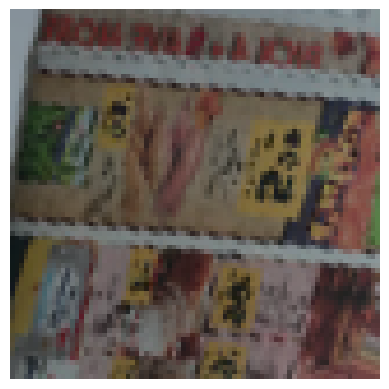

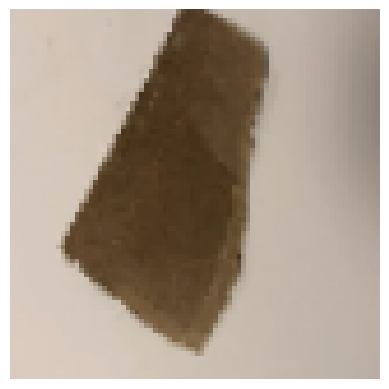

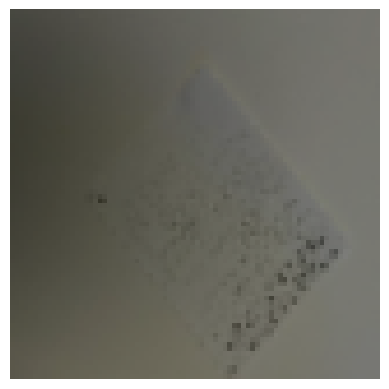

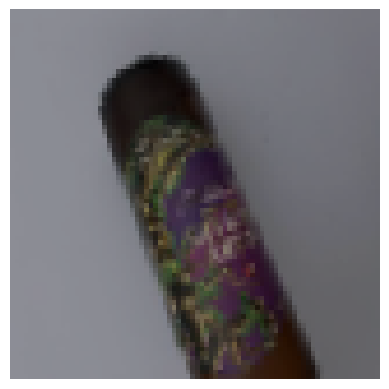

In [11]:
for _ in range(5):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

# Modelling

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input((80, 80, 3)), 
    
    # Hidden Layer
    layers.Conv2D(16, 3),
    layers.Conv2D(32, 3),
    layers.MaxPool2D(),
    layers.Flatten(),
    
    # Output Layer
    layers.Dense(3),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dense (Dense)               (None, 3)                 138627    
                                                                 
Total params: 143,715
Trainable params: 143,715
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"]
)

In [1]:
model.fit(dataset_train, epochs = 10, verbose = 1) 

NameError: name 'model' is not defined

In [ ]:
# hayyyyyy
